In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Synthetic data

In [3]:
data = pd.read_csv("../summary/baseline_categorical.csv", index_col=None)
proposal = pd.read_csv("../summary/proposal_categorical.csv", index_col=None)

In [21]:
subdata = data[data['p'] == 'intermediate']
subdata.sort_values(by=['d'], key=lambda item: item.astype(int), inplace=True)

subproposal = proposal[proposal['p'] == 'intermediate']
subproposal.sort_values(by=['d'], key=lambda item: item.astype(int), inplace=True)

/tmp/ipykernel_221540/1324386800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata.sort_values(by=['d'], key=lambda item: item.astype(int), inplace=True)
/tmp/ipykernel_221540/1324386800.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subproposal.sort_values(by=['d'], key=lambda item: item.astype(int), inplace=True)


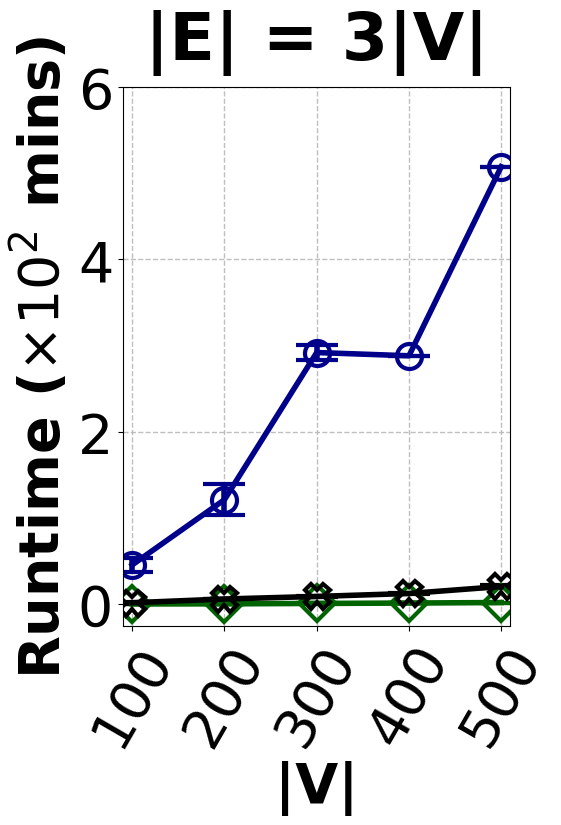

In [28]:
baselines = ['PC', 'GIES']
colors = ['darkblue', 'darkgreen',]
ch = ['o', 'D', ]
level = [100,200,300,400,500]

render_dict = {
    'A': {
        'metric': 'shd',
        'ytitles': r'SHD ($\times 10^2$)',
        'yscale': 100,
        'yticks': [0, 400, 800, 1200],
        'xlim': [90, 510],
        'ylim': None,
    },
    'B': {
        'metric': 'spuriousness',
        'ytitles': 'Spurious Rate (%)',
        'yscale': None,
        'yticks': [0, 10, 20, 30, 40],
        'xlim': [90, 510],
        'ylim': None,
    },
    'C': {
        'metric': 'time',
        'ytitles': r'Runtime ($\times 10^2$ mins)',
        'yscale': 100,
        'yticks': [0, 200, 400, 600],
        'xlim': [90, 510],
        'ylim': None,
    }
}

# for loc in render_dict.keys():
plt.rcParams.update({"font.size": 40})
fig, ax = plt.subplots(figsize=(5, 7))
loc = 'C'
metric = render_dict[loc]['metric']
for algo in baselines:
    plotdata = subdata[subdata['baseline'] == algo]
    ax.errorbar(np.unique(plotdata['d']), plotdata[f'{metric}'], yerr=plotdata[f'{metric}_ci95'], 
                capsize=15, color=colors[baselines.index(algo)], marker=ch[baselines.index(algo)], 
                label=algo, markerfacecolor='none', markersize=18, linewidth=4, markeredgewidth=3)

ax.errorbar(np.unique(subproposal['d']), subproposal[subproposal['mode'] =='n'][f'{metric}'], 
                    yerr=subproposal[subproposal['mode'] =='n'][f'{metric}_ci95'], 
                    capsize=15, color="black", marker="X", label="Proposal", linestyle="-",
                    markerfacecolor='none', markersize=18, linewidth=4, markeredgewidth=3)

ax.set_xlabel("|V|", weight='bold')
ax.set_ylabel(render_dict[loc]['ytitles'], weight='bold')
ax.set_xticks(level, level, rotation=60)
if render_dict[loc]['yticks']:
    if render_dict[loc]['yscale']:
        ax.set_yticks(render_dict[loc]['yticks'], [int(i/render_dict[loc]['yscale']) for i in render_dict[loc]['yticks']])
    else:
        ax.set_yticks(render_dict[loc]['yticks'], render_dict[loc]['yticks'])

ax.grid(visible=True, linestyle='--', linewidth=1, alpha=0.8)
ax.set_title("|E| = 3|V|", pad=20, weight='bold')
if render_dict[loc]['ylim']:
    ax.set_ylim(*render_dict[loc]['ylim'])
if render_dict[loc]['xlim']:
    ax.set_xlim(*render_dict[loc]['xlim'])


In [29]:
fig.set_size_inches(5, 7)
fig.savefig(f"../figs/separate/categorical_{metric}_med.svg",
            # bbox_extra_artists=(lgd,), 
            format="svg", bbox_inches='tight', dpi=500)

### Linear

In [3]:
file = "notears-extreme"
data = pd.read_csv(f"baseline-{file}.csv", index_col=None)
proposal = pd.read_csv(f"proposal-{file}.csv", index_col=None)

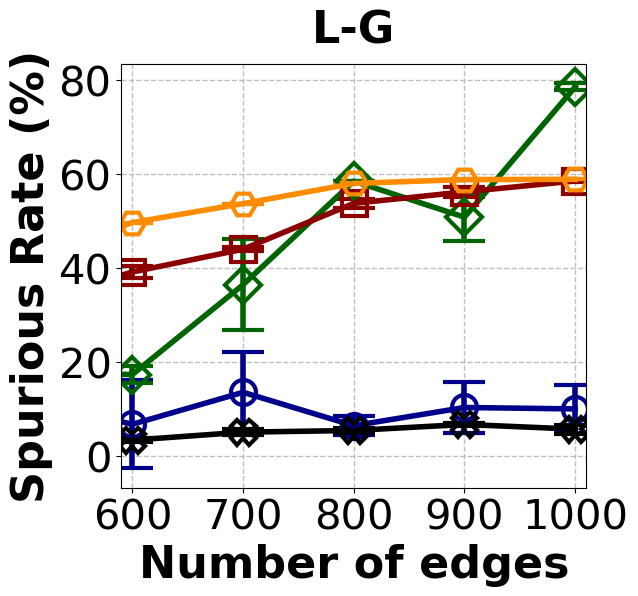

In [12]:
baselines = ["Notears", "MLPNotears", 'DAS', "SCORE",] #  'GIES', 'FCI'
colors = ['darkblue', 'darkgreen', 'darkred', 'darkorange',] # "#999900", "darkcyan"
ch = ['o', 'D', "s", "H", "v", "P"]
level = [600, 700, 800, 900, 1000]
# level = [100,200,300,400,500]

render_dict = {
    'A': {
        'metric': 'shd',
        'ytitles': r'SHD ($\times 10^2$)',
        'yscale': 100,
        'yticks': [0, 500, 1000, 1500, 2000],
        # 'xlim': [90, 510],
        'xlim': [590, 1010],
        'ylim': [-50, 2000],
    },
    'B': {
        'metric': 'spuriousness',
        'ytitles': 'Spurious Rate (%)',
        'yscale': None,
        'yticks': None,
        # 'xlim': [90, 510],
        'xlim': [590, 1010],
        'ylim': None,
    },
    'C': {
        'metric': 'time',
        'ytitles': r'Runtime ($\times 10^2$ mins)',
        'yscale': 100,
        'yticks': [0, 100, 200, 300, 400, 500],
        # 'xlim': [90, 510],
        'xlim': [590, 1010],
        'ylim': [-20, 2000],
    }
}

# for loc in render_dict.keys():
plt.rcParams.update({"font.size": 30})
fig, ax = plt.subplots(figsize=(6, 5.5))
loc = 'B'
metric = render_dict[loc]['metric']
for algo in baselines:
    plotdata = data[data['baseline'] == algo]
    ax.errorbar(np.unique(plotdata['s']), plotdata[f'{metric}'], yerr=plotdata[f'{metric}_ci95'], 
                capsize=15, color=colors[baselines.index(algo)], marker=ch[baselines.index(algo)], 
                label=algo, markerfacecolor='none', markersize=18, linewidth=4, markeredgewidth=3)

ax.errorbar(np.unique(proposal['s']), proposal[proposal['mode'] =='n'][f'{metric}'], 
                    yerr=proposal[proposal['mode'] =='n'][f'{metric}_ci95'], 
                    capsize=15, color="black", marker="X", label="Proposal", linestyle="-",
                    markerfacecolor='none', markersize=18, linewidth=4, markeredgewidth=3)

ax.set_xlabel("Number of edges", fontsize=32, weight='bold')
ax.set_ylabel(render_dict[loc]['ytitles'], fontsize=32, weight='bold')
ax.set_xticks(level, level, rotation=0)
if render_dict[loc]['yticks']:
    if render_dict[loc]['yscale']:
        ax.set_yticks(render_dict[loc]['yticks'], [int(i/render_dict[loc]['yscale']) for i in render_dict[loc]['yticks']])
    else:
        ax.set_yticks(render_dict[loc]['yticks'], render_dict[loc]['yticks'])

ax.grid(visible=True, linestyle='--', linewidth=1, alpha=0.8)

# CHECK ME!!!
ax.set_title("L-G", pad=15, fontsize=32, weight='bold')
if render_dict[loc]['ylim']:
    ax.set_ylim(*render_dict[loc]['ylim'])
if render_dict[loc]['xlim']:
    ax.set_xlim(*render_dict[loc]['xlim'])


In [13]:
fig.set_size_inches(6, 5.5)
fig.subplots_adjust(
    top=0.875,
    bottom=0.2,
    left=0.22,
    right=0.9,
    hspace=0.2,
    wspace=0.2
)
fig.savefig(f"../figs/separate/continuo/{file}-{metric}.svg",
            format="svg", 
            # bbox_inches='tight', 
            dpi=500)

### Legend

<Figure size 600x100 with 0 Axes>

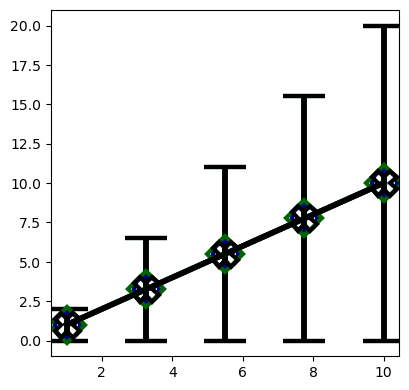

In [8]:
import numpy as np
from matplotlib import pyplot as plt

baselines = ["PC", "GIES"] #  
# baselines = ["Notears", "MLPNotears", 'DAS', "SCORE", 'GIES', 'FCI'] #  
colors = ['darkblue', 'darkgreen', 'darkred', 'darkorange', "#999900", "darkcyan"] #
ch = ['o', 'D', "s", "H", "v", "P"]

x = np.linspace(1, 10, 5)
y = np.linspace(1, 10, 5)
err = np.linspace(1, 10, 5)

legendFig = plt.figure(figsize=(6, 1))
fig, ax = plt.subplots(figsize=(4.5, 4.5))

fig_lists = []
for algo in baselines:
    fig_lists.append(ax.errorbar(x, y, yerr=err, 
                capsize=15, color=colors[baselines.index(algo)], marker=ch[baselines.index(algo)], 
                label=algo, markerfacecolor='none', markersize=18, linewidth=4, markeredgewidth=3))

fig_lists.append(ax.errorbar(x, y, yerr=err, 
                capsize=15, color="black", marker="X", label="Proposal", linestyle="-",
                markerfacecolor='none', markersize=18, linewidth=4, markeredgewidth=3))

legendFig.legend(fig_lists, baselines + ['GLIDE'], loc='center', ncol=len(baselines) + 1, fontsize=30)
# legendFig.savefig('../figs/separate/legend.png')

# legendFig.set_size_inches(20, 1)
legendFig.set_size_inches(6, 1)
legendFig.savefig(f"../figs/separate/categorical/legend.svg",
            format="svg", bbox_inches='tight', dpi=500)

legendFig.show()